In [ ]:
# !ls /content/drive/MyDrive/data/image

In [ ]:
# !7za -y x "/content/drive/MyDrive/data/image/origin.7z.*"

In [ ]:

# !cp -r ./origin "/content/drive/MyDrive/Colab Notebooks/processed_data/"

In [ ]:
images_dir='/content/drive/MyDrive/Colab Notebooks/processed_data/origin'

In [ ]:
# import libaries
import numpy as np
import os
import glob
import pandas as pd
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras


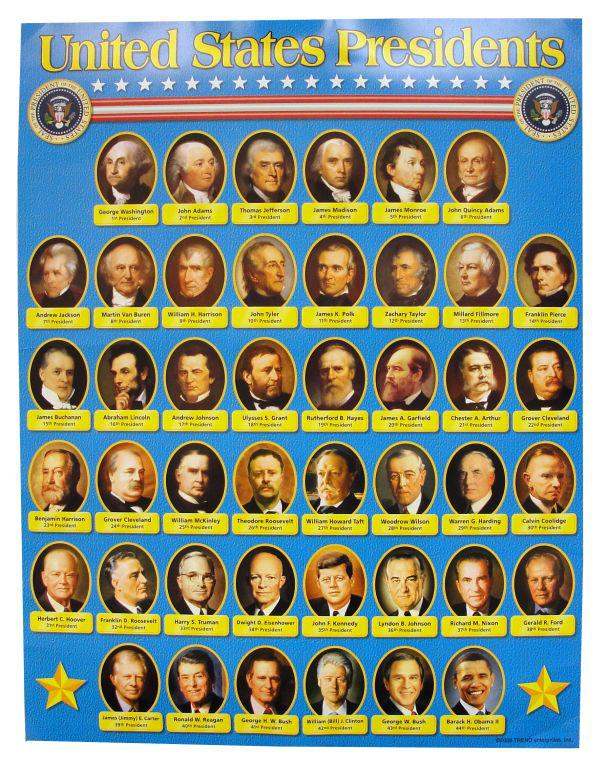

In [ ]:
# create list name with images  and store all images in this list using glob and os

images = list(glob.glob(os.path.join(images_dir, '*.jpg')))
# showing image using PIL.image
PIL.Image.open(str(images[0]))

In [ ]:
print(len(images))

56829


In [ ]:
# create data frame for label.list features

labels_file = "/content/drive/MyDrive/data/label/label.lst"
df = pd.read_csv(labels_file, header=None, delimiter=" ", names=['image_name', 'face_id_in_image',
                                                                 'face_box_top', 'face_box_left',
                                                                 'face_box_right','face_box_bottom',
                                                                 'face_box_cofidence', 'expression_label'])

In [ ]:
df.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


In [ ]:
# crop the images using df filters and save in another  folder

# import cv2
# from tqdm import tqdm

# for index,row in tqdm(df.iterrows()):
#   imges=row['image_name']
#   extrated_images='/content/drive/MyDrive/Colab Notebooks/processed_data/origin'
#   images_path=os.path.join(extrated_images,imges)
#   image=cv2.imread(images_path)
#   if image is not None:
#     face_top=row['face_box_top']
#     face_left=row['face_box_left']
#     face_right=row['face_box_right']
#     face_bottom=row['face_box_bottom']
#     # crop the face from image
#     face=image[face_top:face_bottom,face_left:face_right]
#     #create folder for crop images
#     folder_path='/content/drive/MyDrive/Colab Notebooks/crop_images'
#     os.makedirs(folder_path,exist_ok=True)
#     crop_images_path = os.path.join(folder_path, imges)
#     cv2.imwrite(crop_images_path, face)




In [ ]:
labels=["angry","disgust","fear","happy", "sad","surprise","neutral"]

In [ ]:
# creating sub-folders for labels
# labels_folder='/content/drive/MyDrive/Colab Notebooks/processed_data/label_imgs'
# for lbl in labels:
#   os.makedirs(os.path.join(labels_folder,lbl),exist_ok=True)

In [ ]:
mapper={
0:"angry",
1:"disgust",
2:"fear",
3:"happy",
4:"sad",
5:"surprise",
6:"neutral"}

In [ ]:
# store path of crop images and img_labels in variables
images_path = '/content/drive/MyDrive/Colab Notebooks/crop_images'
labels_path = '/content/drive/MyDrive/Colab Notebooks/crop_img_labels'

In [ ]:
# copy crop images into sub-folders of labels with shutil lib

# import shutil
# from tqdm import tqdm

# for label in tqdm(df.expression_label.unique()):
#     new_df = df[df.expression_label == label]
#     emotion = mapper[label]

#     for image_name in new_df.image_name:
#         img_path = os.path.join(images_path, image_name)
#         if os.path.exists(img_path):
#             dst_path = os.path.join(labels_path, emotion)
#             shutil.copy(img_path, dst_path)

In [ ]:
# check how many images are in sub-folders

for folder in os.listdir(labels_path):
  files=glob.glob(pathname=str(labels_path + '/' + folder +'/*.jpg'))
  print(f'{len(files)} in folder {folder}')

2245 in folder angry
2021 in folder disgust
538 in folder fear
2638 in folder sad
15550 in folder happy
14980 in folder neutral
3395 in folder surprise


In [ ]:
# split the images for training and validation using keras.utils.image_dataset_from_directory method
# 80% for training and 20 for validation
train_data = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/crop_img_labels',
    label_mode='categorical',
    validation_split=0.2,
    subset='training',
    seed=123,
    batch_size=32,
    image_size=(180, 180)
)

val_data = tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/crop_img_labels',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    seed=123,
    batch_size=32,
    image_size=(180, 180)
)


Found 41367 files belonging to 7 classes.
Using 33094 files for training.
Found 41367 files belonging to 7 classes.
Using 8273 files for validation.


In [ ]:
# normalize the images using funtion
def process(img,lbl):
  image=tf.cast(img/255.,tf.float32)
  return image,lbl
train_data=train_data.map(process)
val_data=val_data.map(process)

In [ ]:
# create Cnn model

from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import Sequential

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(180,180,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding='valid'))
# create Neural Network
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 177, 177, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 174, 174, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 172, 172, 128)     73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 171, 171, 128)   

In [ ]:
# compile the model with adam optimixer loss categorical_crossentropy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# training the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
 470/1035 [============>.................] - ETA: 1:55:30 - loss: 1.8706 - accuracy: 0.3726

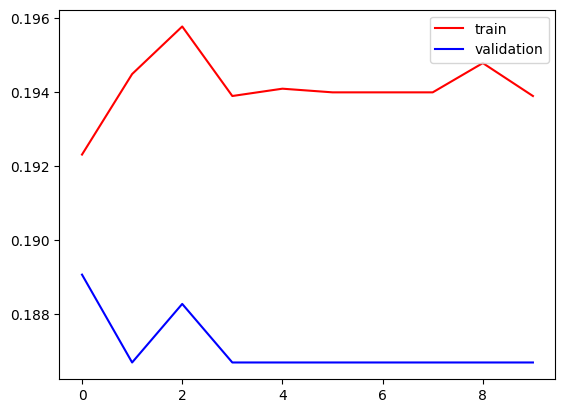

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()